In [25]:
import pandas as pd

# Load the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# Combine features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)



{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [26]:
# Categorical Variable Table for 'Sex'
sex_counts = data['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Number of observations']
print("\nCategorical Variable Table:")
print(sex_counts)

# Numeric Variable Summary
numeric_summary = data.describe().loc[['min', '50%', 'mean', 'max']]
numeric_summary = numeric_summary.rename(index={'50%': 'median'})

# Calculate correlations of numeric variables with 'Rings'
correlations = data.corr()['Rings']
numeric_summary = numeric_summary.append(pd.DataFrame([correlations], index=['correlation']))

print("\nNumeric Variable Summary:")
print(numeric_summary)


Categorical Variable Table:
  Sex  Number of observations
0   M                    1528
1   I                    1342
2   F                    1307

Numeric Variable Summary:
               Length  Diameter    Height  Whole_weight  Shucked_weight  \
min          0.075000  0.055000  0.000000      0.002000        0.001000   
median       0.545000  0.425000  0.140000      0.799500        0.336000   
mean         0.523992  0.407881  0.139516      0.828742        0.359367   
max          0.815000  0.650000  1.130000      2.825500        1.488000   
correlation  0.556720  0.574660  0.557467      0.540390        0.420884   

             Viscera_weight  Shell_weight      Rings  
min                0.000500      0.001500   1.000000  
median             0.171000      0.234000   9.000000  
mean               0.180594      0.238831   9.933684  
max                0.760000      1.005000  29.000000  
correlation        0.503819      0.627574   1.000000  


/var/folders/n5/5m21gqk53md6184rfrgjdjmm0000gn/T/ipykernel_28228/2121965496.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['Rings']
/var/folders/n5/5m21gqk53md6184rfrgjdjmm0000gn/T/ipykernel_28228/2121965496.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_summary = numeric_summary.append(pd.DataFrame([correlations], index=['correlation']))


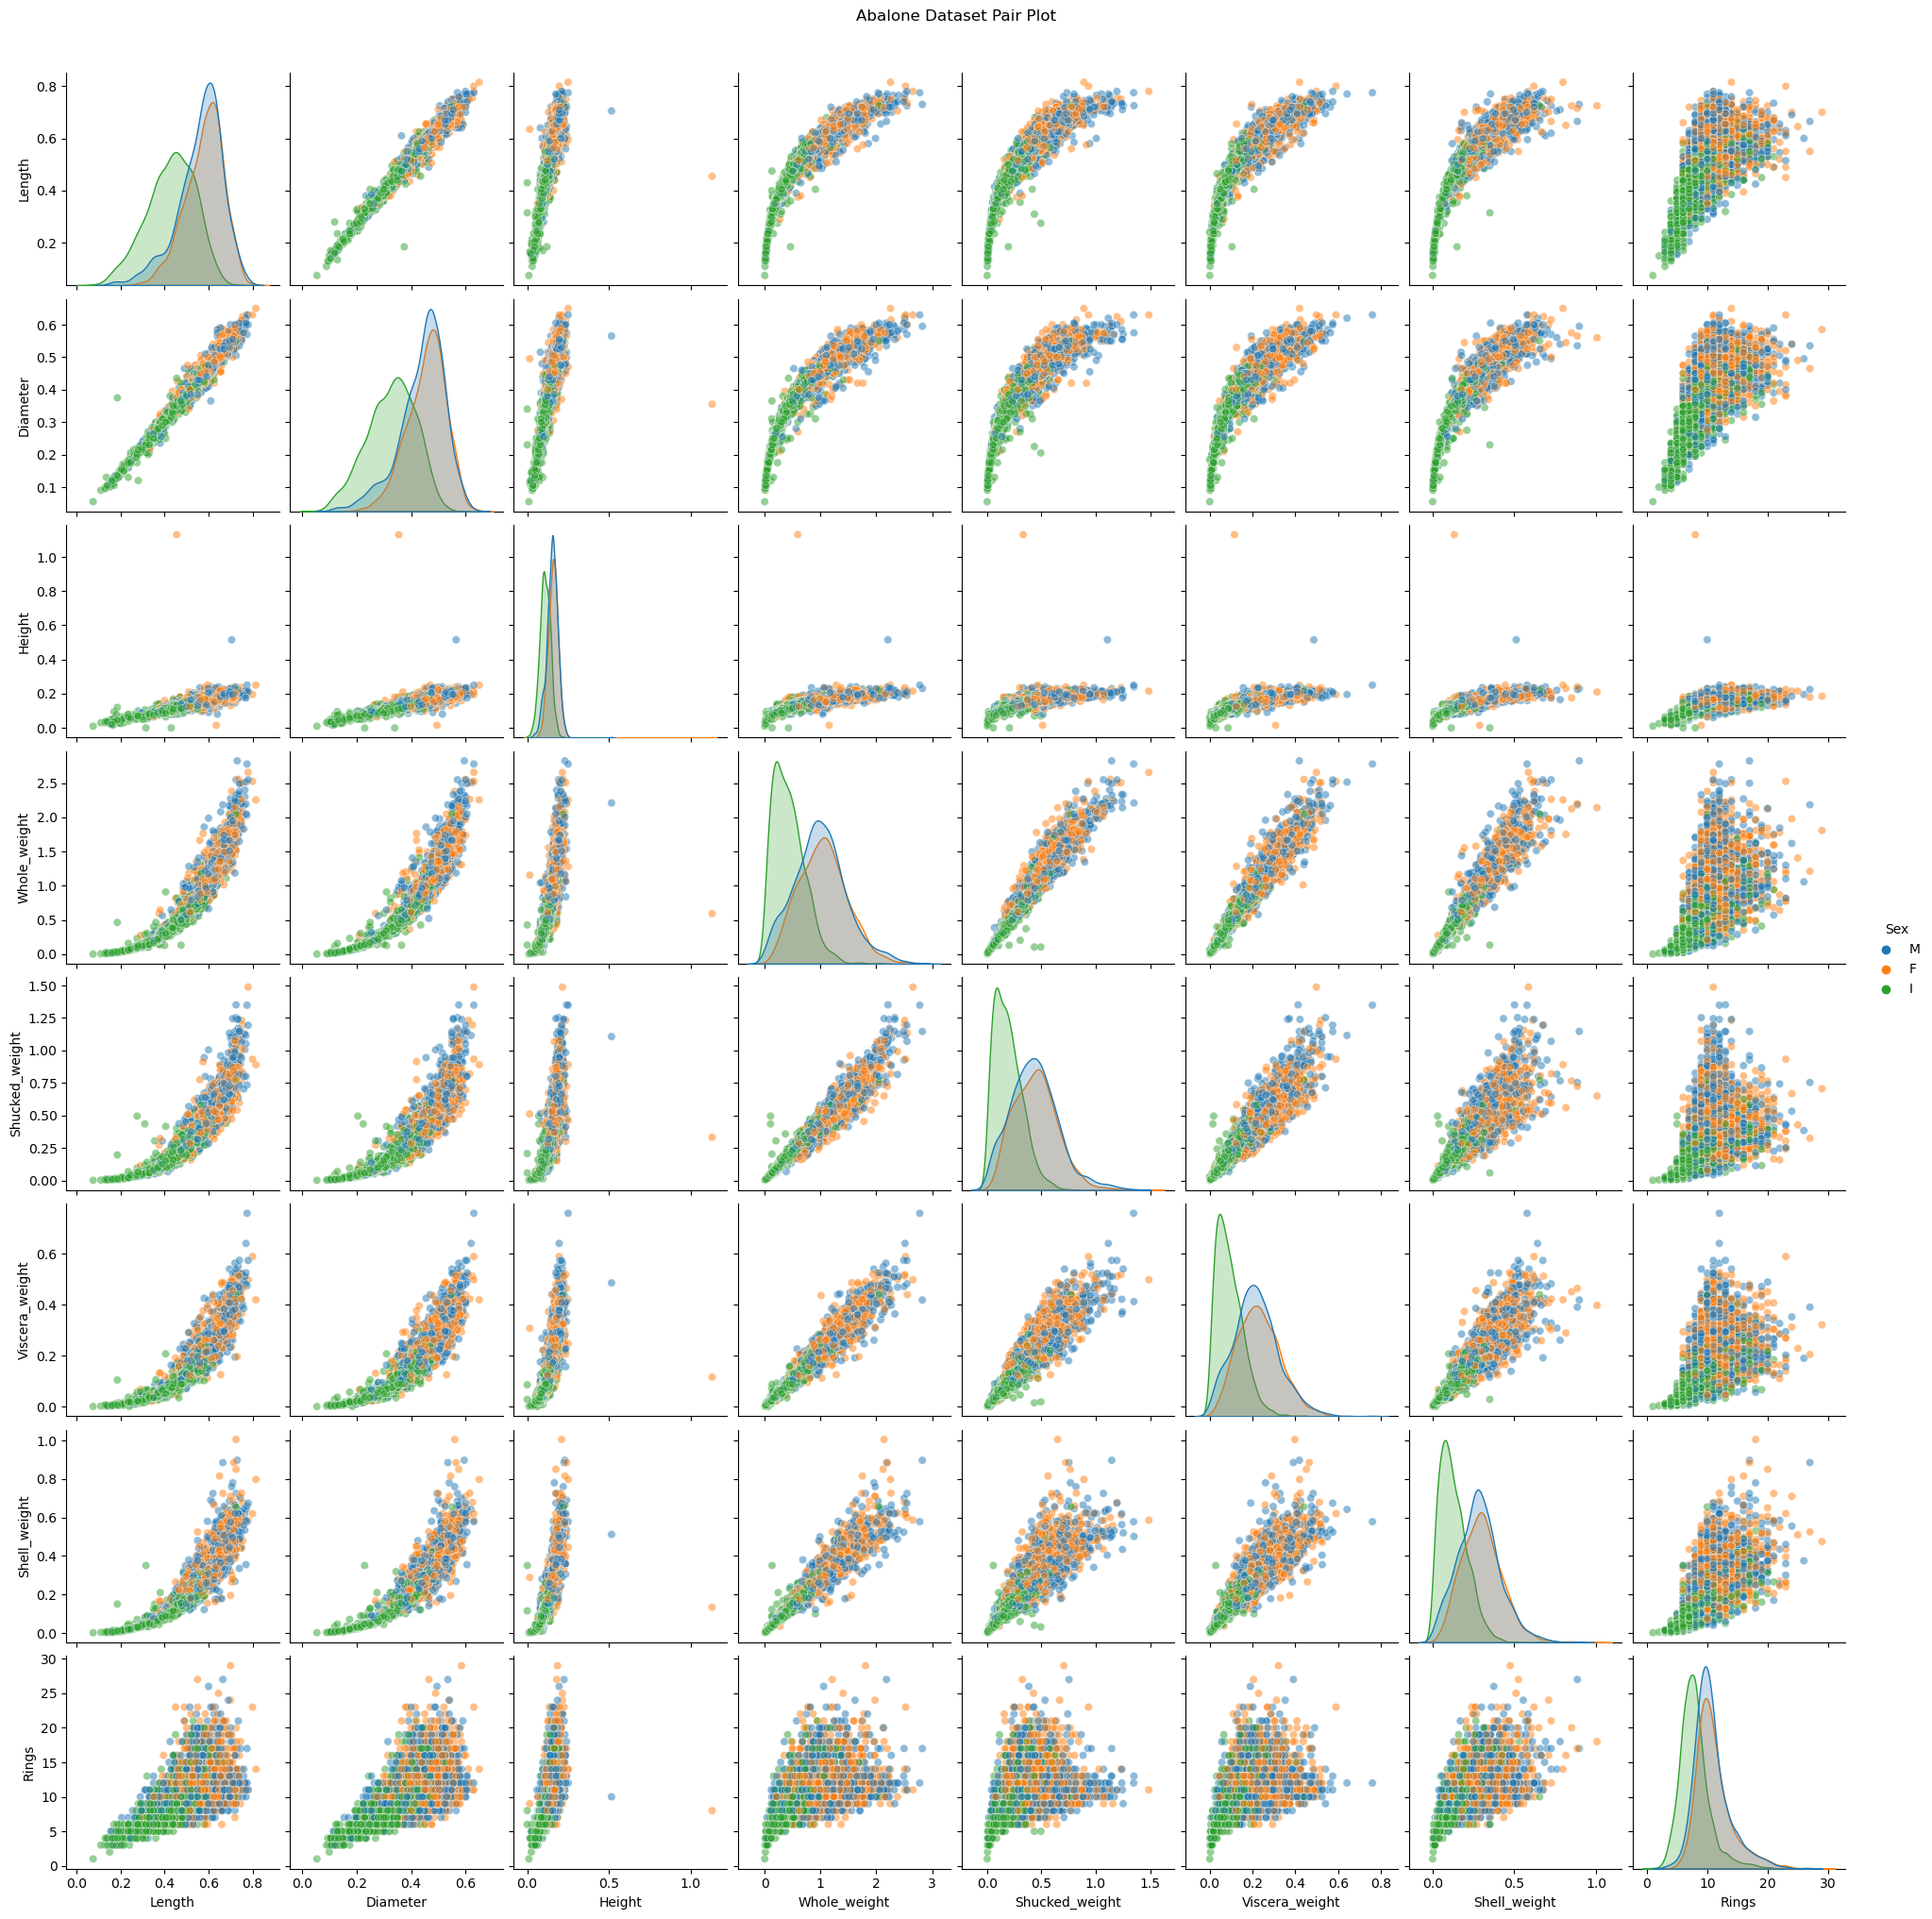

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the pairplot
sns.pairplot(data, hue='Sex', diag_kind='kde', plot_kws={'alpha': 0.5})

# Show the plot
plt.suptitle('Abalone Dataset Pair Plot', y=1.02)  # Adjust title position
plt.show()

In [28]:
# Save the plot as a PNG file
plt.savefig("Abalone_Dataset_Scatterplot.png", format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [45]:
# 将 Sex 列重新定义为 Infant 和 Non-Infant
data['Sex'] = data['Sex'].apply(lambda x: 'Infant' if x == 'I' else 'Non-Infant')

# 验证转换结果
print(data['Sex'].value_counts())
print(data.head())

Non-Infant    4177
Name: Sex, dtype: int64
          Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0  Non-Infant   0.455     0.365   0.095        0.5140          0.2245   
1  Non-Infant   0.350     0.265   0.090        0.2255          0.0995   
2  Non-Infant   0.530     0.420   0.135        0.6770          0.2565   
3  Non-Infant   0.440     0.365   0.125        0.5160          0.2155   
4  Non-Infant   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150      3  
1          0.0485         0.070      1  
2          0.1415         0.210      2  
3          0.1140         0.155      2  
4          0.0395         0.055      1  


In [46]:
# Define the classification function based on 'Rings'
def get_age_class(rings):
    if rings <= 7:
        return 1  # Class 1: 0 - 7 years
    elif rings <= 10:
        return 2  # Class 2: 8 - 10 years
    elif rings <= 15:
        return 3  # Class 3: 11 - 15 years
    else:
        return 4  # Class 4: Greater than 15 years

# Example of applying the function during model input preparation
# Assuming 'data' is the DataFrame and 'X' is your feature set without 'Rings'

# Apply the function to get the target classes
y = data['Rings'].apply(get_age_class)